# Yoda Histo2D

In [1]:
import matplotlib.pyplot as plt

from babyyoda import loc, project, rebin, yoda

## Create Histo2D

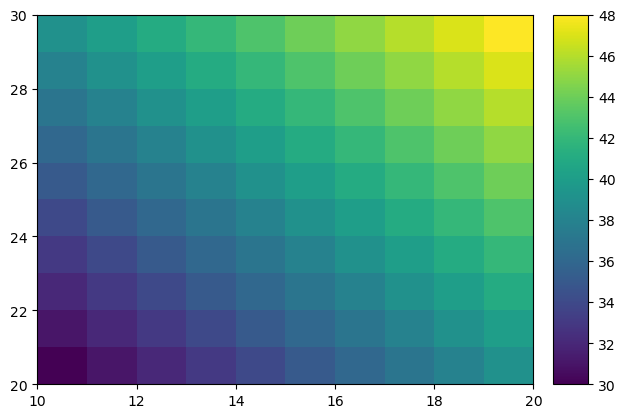

In [2]:
# Simple 2D histogram, 1 entry per bin, some overflows that should not matter
h = yoda.Histo2D(10, 10, 20, 10, 20, 30, title="test")
for i in range(-10, 32):
    for j in range(-10, 32):
        h.fill(i, j, i + j)
h

## Access

In [3]:
h[0, 0]

<Dbn2D(mean=None, stddev=None)>

## Setting

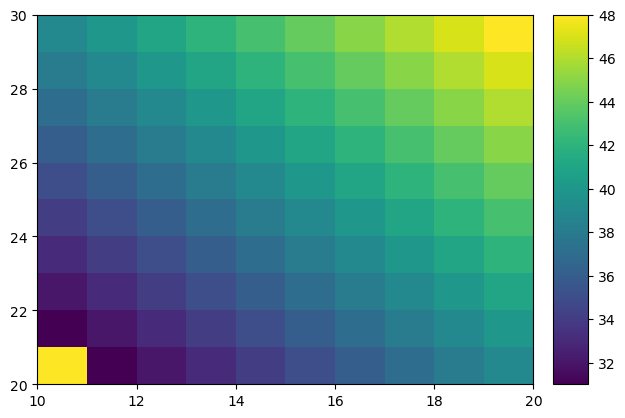

In [4]:
h[0, 0] = h[-1, loc(20)]
h

## Slicing

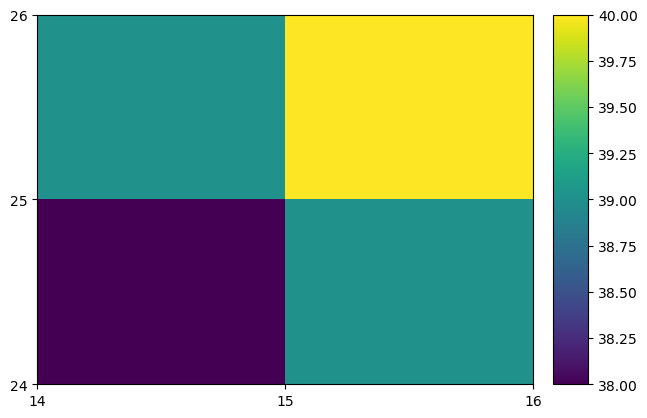

In [5]:
h[4:6, 4:6]

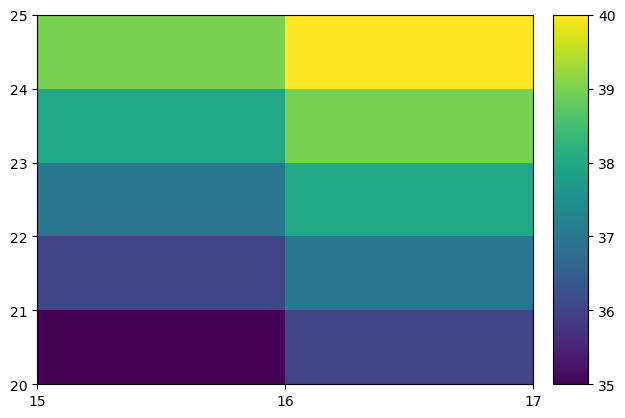

In [6]:
h[loc(15) : loc(17), loc(20) : loc(25)]

## Rebin

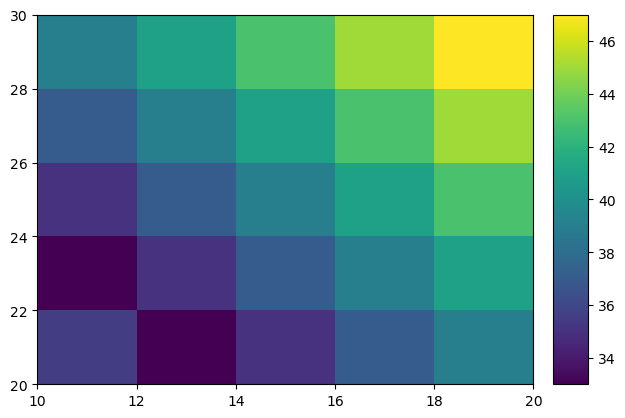

In [7]:
h[:: rebin(2), :: rebin(2)]

## Project/Sum axis

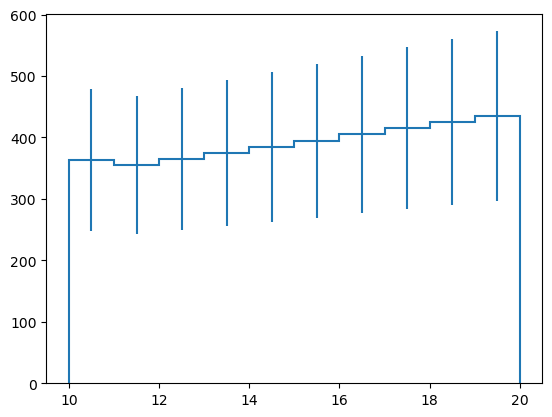

In [8]:
h[:, ::project]

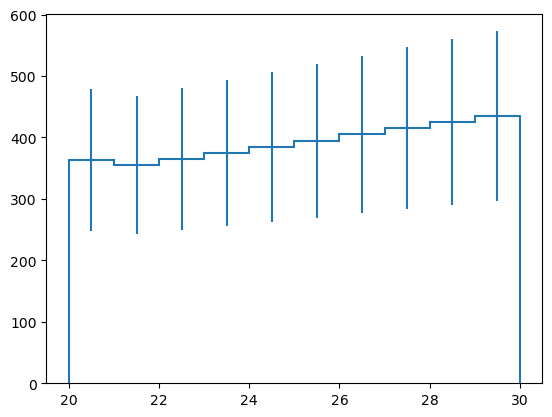

In [9]:
h[::project, :]

## String

In [10]:
print(h[:2, :2].to_string())

BEGIN YODA_HISTO2D_V3 /
Path: /
Title: test
Type: Histo2D
---
# Mean: (1.750405e+01, 1.750890e+01)
# Integral: 3.706200e+04
Edges(A1): [1.000000e+01, 1.100000e+01, 1.200000e+01]
Edges(A2): [2.000000e+01, 2.100000e+01, 2.200000e+01]
# sumW       	sumW2        	sumW(A1)     	sumW2(A1)    	sumW(A2)     	sumW2(A2)    	sumW(A1,A2)  	numEntries
2.400000e+03 	7.450000e+04 	1.875000e+04 	6.045000e+04 	5.575000e+04 	6.329500e+05 	6.190000e+04 	6.000000e+02
4.350000e+02 	8.555000e+03 	4.350000e+03 	4.350000e+04 	4.205000e+03 	6.162500e+04 	4.205000e+04 	3.000000e+01
4.650000e+02 	9.455000e+03 	5.115000e+03 	5.626500e+04 	4.340000e+03 	6.448000e+04 	4.774000e+04 	3.000000e+01
1.560000e+04 	4.705000e+05 	3.553500e+05 	8.587650e+06 	1.151500e+05 	1.889150e+06 	2.565500e+06 	6.000000e+02
3.900000e+02 	8.270000e+03 	4.700000e+02 	1.240000e+04 	7.800000e+03 	1.560000e+05 	9.400000e+03 	2.000000e+01
4.800000e+01 	2.304000e+03 	9.120000e+02 	1.732800e+04 	1.392000e+03 	4.036800e+04 	2.644800e+04 	1.0000

In [11]:
print(h[:2, :2].to_grogu_v2().to_string())

BEGIN YODA_HISTO2D_V2 /
Path: /
Title: test
Type: Histo2D
---
# Mean: (1.348592e+01, 2.348592e+01)
# Volume: 1.420000e+02
# ID	 ID	 sumw	 sumw2	 sumwx	 sumwx2	 sumwy	 sumwy2	 sumwxy	 numEntries
Total   	Total   	1.420000e+02	5.250000e+03	1.915000e+03	2.805100e+04	3.335000e+03	8.055100e+04	4.717000e+04	4.000000e+00
# 2D outflow persistency not currently supported until API is stable
# xlow	 xhigh	 ylow	 yhigh	 sumw	 sumw2	 sumwx	 sumwx2	 sumwy	 sumwy2	 sumwxy	 numEntries
1.000000e+01	1.000000e+01	2.000000e+01	2.000000e+01	4.800000e+01	2.304000e+03	9.120000e+02	1.732800e+04	1.392000e+03	4.036800e+04	2.644800e+04	1.000000e+00
1.100000e+01	1.100000e+01	2.000000e+01	2.000000e+01	3.100000e+01	9.610000e+02	3.410000e+02	3.751000e+03	6.200000e+02	1.240000e+04	6.820000e+03	1.000000e+00
1.000000e+01	1.200000e+01	2.100000e+01	2.000000e+01	3.100000e+01	9.610000e+02	3.100000e+02	3.100000e+03	6.510000e+02	1.367100e+04	6.510000e+03	1.000000e+00
1.100000e+01	1.000000e+01	2.100000e+01	2.100000e+01	3.200

## Load file

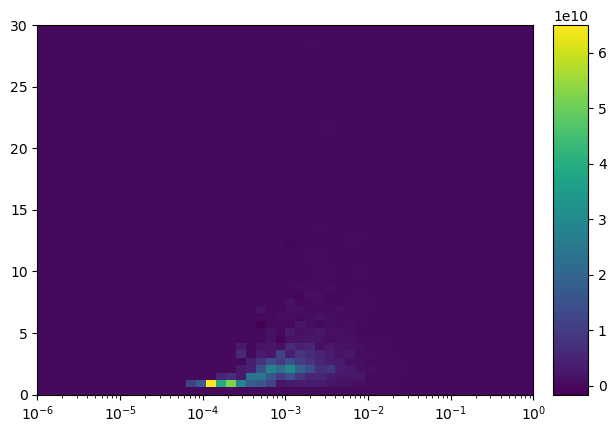

In [12]:
hists = yoda.read("../tests/test_histo2d_v2.yoda")
h = hists["/ALICE_2020_I1797621/GGPdfXQ"]
h.plot()
plt.xscale("log")

## Write file

In [13]:
yoda.write(hists, "test.yoda")

In [14]:
yoda.write(hists, "test.yoda.gz")